# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [ ]:
from sklearn.model_selection import train_test_split

X=data.drop(columns='MEDV')
y=data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (404, 13) (102, 13)
Train and test sizes of y: (404,) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Fitting a multiple linear model
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting

# Notas para mí misma >>>>>
# Regrerssion coefs
#coefs_lr = pd.Series(np.abs(lr.coef_), X.columns).sort_values()
#coefs_lr
# Plotting abs value of model coefficients
#coefs_lr.plot(kind='bar', title='Model Coefficients')
# # Notas para mí misma <<<<<

# Prediction
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# The coefficients
print('Intercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))

Intercept and coefs:
30.246750993923158 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


## 3. Calculate and print R-squared for both the training and the testing set.

In [14]:
# evaluation
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

# The coefficient of determination: 1 is perfect prediction
print('R^2 Score for train: {}'.format(r2score_train))
print('R^2 Score for test: {}'.format(r2score_test))

R^2 Score for train: 0.7508856358979672
R^2 Score for test: 0.6687594935356245


## 4. Calculate and print mean squared error for both the training and the testing set.

In [ ]:
from sklearn.metrics import mean_squared_error

# evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# The mean squared error
print('MSE for train: {}'.format(mse_train))
print('MSE for test: {}'.format(mse_test))

MSE for train: 21.641412753226316
MSE for test: 24.291119474974067


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [19]:
from sklearn.metrics import mean_absolute_error

# evaluation
mse_abs_train = mean_absolute_error(y_train, y_train_pred)
mse_abs_test = mean_absolute_error(y_test, y_test_pred)

# The mean squared error
print('Mean Absolute Error for train: {}'.format(mse_abs_train))
print('Mean Absolute Error for test: {}'.format(mse_abs_test))

Mean Absolute Error for train: 3.3147716267832337
Mean Absolute Error for test: 3.1890919658879158


## Classification Model Evaluation

In [20]:
from sklearn.datasets import load_iris
data = load_iris()

In [21]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [22]:
column_names = data.feature_names

In [23]:
df = pd.DataFrame(data['data'],columns=column_names)

In [24]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
target = pd.DataFrame(data.target)

In [27]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [28]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (120, 4) (30, 4)
Train and test sizes of y: (120, 1) (30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_pred = y_train_pred, y_true = y_train))
print()
print(classification_report(y_pred = y_test_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [51]:
# Method A)
accuracy_train = log_reg.score(X_train, y_train)
accuracy_test = log_reg.score(X_test, y_test)
print('-- Method A) --')
print(f"Accuracy for train: {accuracy_train:.2f}")
print(f"Accuracy for test: {accuracy_test:.2f}")
print()

# Method B)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('-- Method B) --')
print(f"Accuracy for train: {accuracy_train:.2f}")
print(f"Accuracy for test: {accuracy_test:.2f}")

-- Method A) --
Accuracy for train: 0.97
Accuracy for test: 1.00

-- Method B) --
Accuracy for train: 0.97
Accuracy for test: 1.00


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [52]:
from sklearn.metrics import balanced_accuracy_score

accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
accuracy_test = balanced_accuracy_score(y_test, y_test_pred)
print(f"Balanced accuracy for train: {accuracy_train:.2f}")
print(f"Balanced accuracy for test: {accuracy_test:.2f}")

Balanced accuracy for train: 0.98
Balanced accuracy for test: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [53]:
from sklearn.metrics import precision_score
precis_train = precision_score(y_train, y_train_pred, average='weighted')
precis_test = precision_score(y_test, y_test_pred, average='weighted')
print(f"Precision for train: {precis_train:.2f}")
print(f"Precision for test: {precis_test:.2f}")

Precision for train: 0.98
Precision for test: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [54]:
from sklearn.metrics import recall_score
rec_train = recall_score(y_train, y_train_pred, average='weighted')
rec_test = recall_score(y_test, y_test_pred, average='weighted')
print(f"Recall for train: {rec_train:.2f}")
print(f"Recall for test: {rec_test:.2f}")

Recall for train: 0.97
Recall for test: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [55]:
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1 for train: {f1_train:.2f}")
print(f"F1 for test: {f1_test:.2f}")

F1 for train: 0.97
F1 for test: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

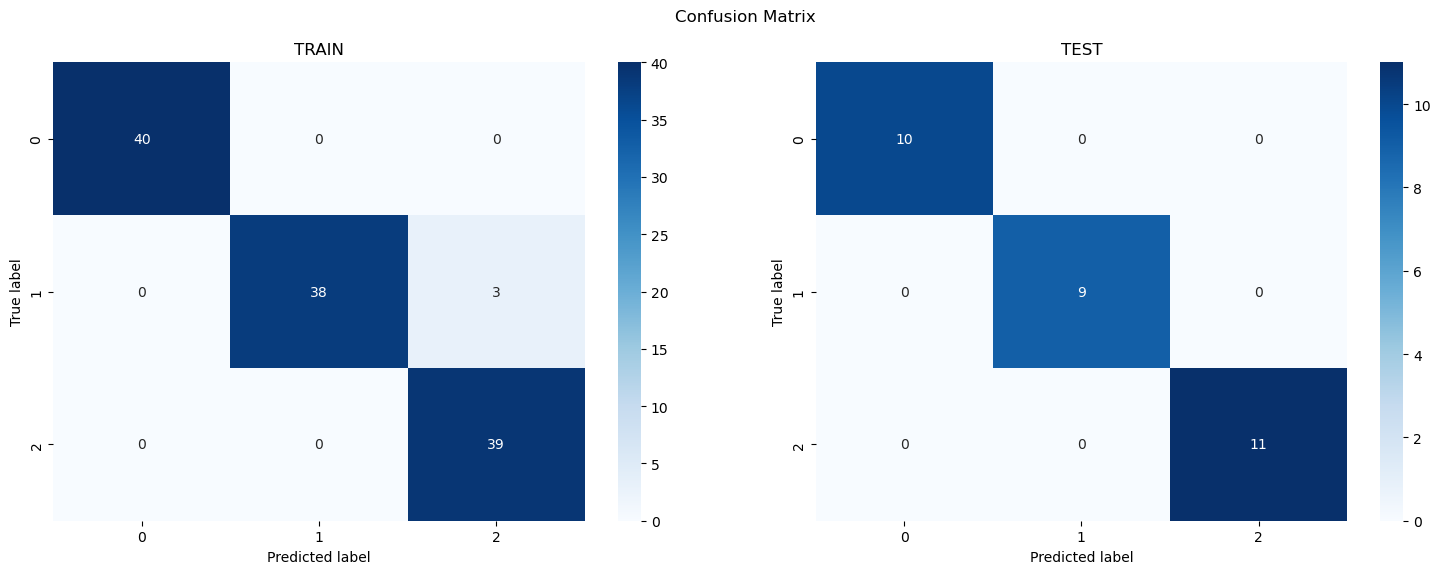

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Obtener la matriz de confusión
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

#Crear un mapa de calor para visualizar la matriz de confusión
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title('TRAIN')
axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('TEST')
axs[1].set_xlabel('Predicted label')
axs[1].set_ylabel('True label')
plt.tight_layout(rect=[0, 0.03, 1, 0.95], w_pad=6) #rect=[left, bottom, right, top
fig.suptitle('Confusion Matrix')

#Mostrar la matriz de confusión
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !